In [108]:
import pandas as pd
import numpy as np

## **KNN for Classification Problem**

Below is a Python example using KNN for a classification task on the Iris dataset:

### **Data Preprocessing**

#### **Data Collection & Cleaning**

In [109]:
data_frame = pd.read_csv("../datasets/Iris.csv")
data_frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- **data_frame["clm_name"].value_counts()**:  Get the list values for each different classes of given column name.

In [110]:
data_frame["Species"].value_counts() # Get the values for each different classes

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- **data_frame.info()**: Return the information of the each columns od the data_frame

In [111]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [112]:
data_frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- **data_frame.iloc[row_range, column_range]**: Return the new data frame according to given **index ranges** of the data_frame

In [113]:
x_vals = data_frame.iloc[:, 1:5] # also data_frame.drop(columns=["Id", "Species"]) can be use.
x_vals

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
y_vals = data_frame.iloc[: , -1]
y_vals

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#### **Feature Scaling**

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
x_vals = scaler.fit_transform(x_vals)
x_vals[0:3, :]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

#### **Data Splitting**

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals)

### **Model Training**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

- **Model Creation**

In [120]:
model = KNeighborsClassifier(n_neighbors=1) # n_neighbors: K value for predictions
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

- **Prediction**

In [121]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [122]:
y_test

20         Iris-setosa
54     Iris-versicolor
17         Iris-setosa
62     Iris-versicolor
143     Iris-virginica
137     Iris-virginica
8          Iris-setosa
15         Iris-setosa
129     Iris-virginica
31         Iris-setosa
139     Iris-virginica
99     Iris-versicolor
64     Iris-versicolor
106     Iris-virginica
87     Iris-versicolor
44         Iris-setosa
147     Iris-virginica
79     Iris-versicolor
55     Iris-versicolor
127     Iris-virginica
141     Iris-virginica
27         Iris-setosa
103     Iris-virginica
0          Iris-setosa
35         Iris-setosa
78     Iris-versicolor
86     Iris-versicolor
34         Iris-setosa
57     Iris-versicolor
72     Iris-versicolor
25         Iris-setosa
88     Iris-versicolor
63     Iris-versicolor
68     Iris-versicolor
114     Iris-virginica
1          Iris-setosa
121     Iris-virginica
135     Iris-virginica
Name: Species, dtype: object

### **Model Evaluation**

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8947368421052632

In [125]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[12,  0,  0],
       [ 0, 11,  3],
       [ 0,  1, 11]])

In [126]:
cr = classification_report(y_test, y_pred) 
print(cr) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.79      0.92      0.85        12

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



##
---

## **KNN for Regression Problem**

Below is a Python example using KNN for a regression task on a synthetic dataset:

In [127]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

data = pd.DataFrame(X, y)

data

,0
137.096464,1.852278
59.002556,0.473592
-76.592075,-1.230864
60.803919,0.625667
-8.886217,-0.072010
...,...
40.047400,0.232254
-95.571073,-1.328186
153.137950,1.538037
-46.996531,-0.392108


In [128]:
from matplotlib import pyplot as plt

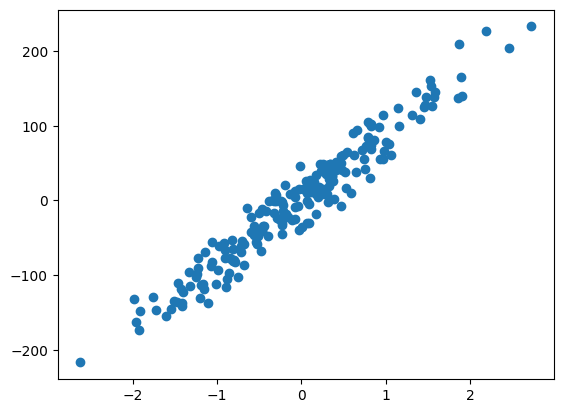

In [129]:
plt.scatter(X, y)

In [130]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [131]:
# Predictions
y_pred = knn_reg.predict(X_test)
y_pred

array([  70.5358176 ,   35.51922381, -129.80847999,    3.92803339,
        -87.59454853,   77.05462539,   -6.63632538,   -6.63632538,
       -147.48625449,  -98.60794739,   25.88567556,  -39.05359263,
        -74.59023681,   33.43121433,  -97.00810383, -147.48625449,
        -43.13349056,   39.3931805 ,    9.57020838,   29.37697945,
         29.37697945,    5.16330402,  171.04324182,  -14.94370044,
        -56.06434941,   35.51922381,  147.19959656,   39.3931805 ,
        -56.06434941,   90.02947574,   53.37983981,  -80.74977437,
         90.02947574,  -98.08720476,  -18.58165133,   78.20409762,
        -75.64308519,  -41.85257448,  -84.27037529, -149.99815656])

In [132]:
y_test

array([  84.0122955 ,    9.17389724, -117.85747845,   10.09198533,
        -57.58071971,   84.81657953,    6.80800718,  -23.02140413,
       -163.09469932, -103.04859629,   47.84674471,  -34.0598647 ,
       -102.33340789,   -2.44415311,  -82.02148321, -216.90612703,
        -33.60917684,   32.89914907,   15.23536785,   49.69735824,
         61.02930538,  -30.31026428,  227.59330847,   12.45117557,
        -58.27048461,   37.01553592,  126.43943641,   39.80738743,
         -9.64113152,   99.43341751,   94.80358578,  -61.50771415,
        124.36665478, -130.95580487,  -32.62063357,   60.50451136,
        -54.35596972,  -56.05331044, -116.29773111, -146.69372259])

In [133]:
mse = mean_squared_error(y_test, y_pred)
mse

658.8393915244677